Using one of ROOT’s powerful classes, here TF, will allow us to display a function of one variable, x. It is worth mentioning that just like TF1 all ROOT classes’ names start with the letter T. A notable exception is RooFit. In this context all classes’ names are of the form Roo*.

Try the following:

In [1]:
TF1 f1("f1","sin(x)/x",0.,10.);

f1 is an instance of a TF1 class, the arguments are used in the constructor; the first one of type string is a name to be entered in the internal ROOT memory management system, the second string type parameter defines the function, here sin(x)/x, and the two parameters of type double define the range of the variable x.

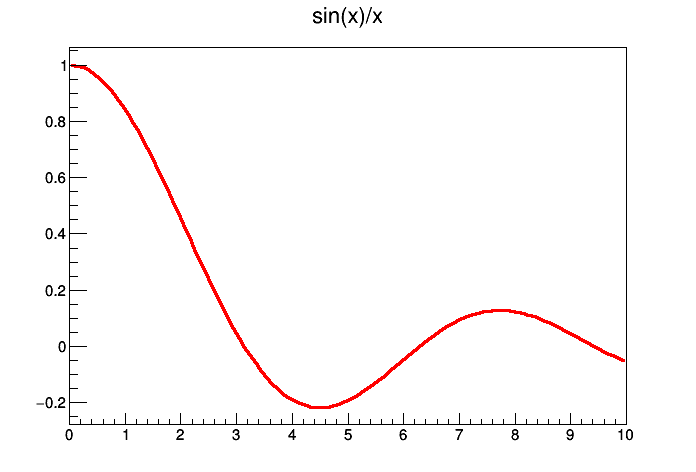

In [2]:
TCanvas c;
f1.Draw();
c.Draw();

The Draw() method, here without any parameters, displays the function in a window which should pop up after you typed the above two lines. In the notebook enviroment in order to simulate this functionality we are using an instance of Tcanvas.

A slightly extended version of this example is the definition of a function with parameters, called [0], [1] and so on in the ROOT formula syntax. We now need a way to assign values to these parameters; this is achieved with the method SetParameter(<parameter_number>,<parameter_value>) of class TF1. Here is an example:

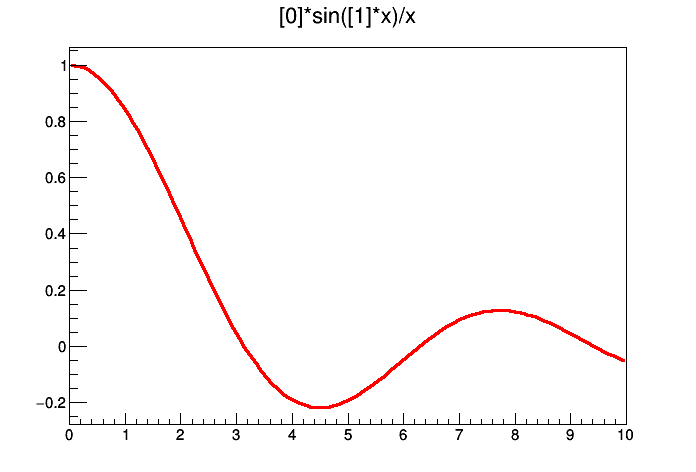

In [3]:
TF1 f2("f2","[0]*sin([1]*x)/x",0.,10.);
f2.SetParameter(0,1);
f2.SetParameter(1,1);
f2.Draw();
c.Draw();

Of course, this version shows the same results as the initial one. Try playing with the parameters and plot the function again. The class TF1 has a large number of very useful methods, including integration and differentiation. To make full use of this and other ROOT classes, visit the documentation on the Internet under http://root.cern.ch/drupal/content/reference-guide. Formulae in ROOT are evaluated using the class TFormula, so also look up the relevant class documentation for examples, implemented functions and syntax.

You should definitely download this guide to your own system to have it at you disposal whenever you need it.

To extend a little bit on the above example, consider a more complex function you would like to define. You can also do this using standard C or C++ code.

Consider the example below, which calculates and displays the interference pattern produced by light falling on a multiple slit. Please do not type in the example below at the ROOT command line, there is a much simpler way: Make sure you have the file slits.C on disk, and type root slits.C in the shell. This will start root and make it read the “macro” slits.C, i.e. all the lines in the file will be executed one after the other.



In [4]:
%%cpp -d
auto pi = TMath::Pi();

// function code in C
double single(double *x, double *par) {
  return pow(sin(pi*par[0]*x[0])/(pi*par[0]*x[0]),2);
}

double nslit0(double *x,double *par){
  return pow(sin(pi*par[1]*x[0])/sin(pi*x[0]),2);
}

double nslit(double *x, double *par){
  return single(x,par) * nslit0(x,par);
}

// This is the main program
void slits() {
  float r,ns;

  // request user input
  cout << "slit width / g ? ";
  scanf("%f",&r);
  cout << "# of slits? ";
  scanf("%f",&ns);
  cout <<"interference pattern for "<< ns
       <<" slits, width/distance: "<<r<<endl;

  // define function and set options
  TF1 *Fnslit  = new TF1("Fnslit",nslit,-5.001,5.,2);
  Fnslit->SetNpx(500);

  // set parameters, as read in above
  Fnslit->SetParameter(0,r);
  Fnslit->SetParameter(1,ns);

  // draw the interference pattern for a grid with n slits
  Fnslit->Draw();
}

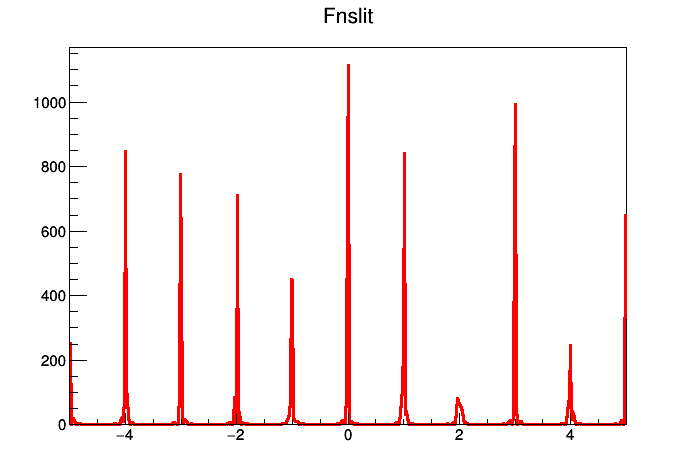

slit width / g ? # of slits? interference pattern for 1.22542e+36 slits, width/distance: 4.58701e-41


In [5]:
TCanvas m;
slits();
m.Draw();

Output of slits.C with parameters 0.2 and 2.

The example first asks for user input, namely the ratio of slit width over slit distance, and the number of slits. After entering this information, you should see the graphical output as is shown in Figure 2.1.

This is a more complicated example than the ones we have seen before, so spend some time analysing it carefully, you should have understood it before continuing. Let us go through it in detail:

Lines 7-18 define the necessary functions in C++ code, split into three separate functions, as suggested by the problem considered. The full interference pattern is given by the product of a function depending on the ratio of the width and distance of the slits, and a second one depending on the number of slits. More important for us here is the definition of the interface of these functions to make them usable for the ROOT class TF1: the first argument is the pointer to x, the second one points to the array of parameters.

The main program starts at line 21 with the definition of a function slits() of type void. After asking for user input, a ROOT function is defined using the C-type function given in the beginning. We can now use all methods of the TF1 class to control the behaviour of our function – nice, isn’t it ?

If you like, you can easily extend the example to also plot the interference pattern of a single slit, using function double single, or of a grid with narrow slits, function double nslit0, in TF1 instances.

Here, we used a macro, some sort of lightweight program, that the interpreter distributed with ROOT, Cling, is able to execute. This is a rather extraordinary situation, since C++ is not natively an interpreted language! There is much more to say: chapter is indeed dedicated to macros.